In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class Hood1D:
    """
    z: sites
    n: turns
    p: police presence in each site
    b: initial criminal population
    s: crime level for each site
    beta: arrest rate
    theta: police reactivity
    """
    def __init__(self, z=2, n=10, p=None, b=None,
                 s=None, beta=0.1, theta=0.05):
        self.z = z
        self.n = n
        self.beta = beta
        self.theta = theta
        
        self.p = np.ones(z) if p is None else p
        self.b = np.ones(z) if b is None else b
        self.s = np.zeros(z) if s is None else s
        
        # initialize grids
        # B: criminals
        self.B = np.zeros((n, z))
        # P: police
        self.P = np.zeros((n, z))
        # A: arrests
        self.A = np.zeros((n, z))
        
        # initial conditions
        self.B[0] = self.b
        self.P[0] = self.p + self.theta * self.b
        self.A[0] = self.beta * self.P[0] * self.B[0]
        
        self.t = 0
    
    """
    transition function:
    For site i, returns array of length z;
    each entry is probability of moving to that
    site from i
    """
    def PI_ij(self, i):
        t = self.t
        p_ = self.P[t]
        x = np.log(1 + np.exp(p_[i] - p_))
        return x / x.sum()
        
    def step(self):
        t = self.t
        # the population at t is reduced by arrests at t
        b_ = self.B[t] - self.A[t]
        # the population moves based on police presence at t
        for i in range(self.z):
            self.B[t+1] += b_[i] * self.PI_ij(i)
        # population is increased by source at each site
        self.B[t+1] += self.s
        # police react to updated population
        self.P[t+1] = self.p + self.theta * self.B[t+1]
        # calulate arrests at t+1
        self.A[t+1] = self.beta * self.P[t+1] * self.B[t+1]
        
        self.t += 1
        
    def loop(self):
        for i in range(self.n - 1):
            self.step()
            
    def draw(self):
        a = self.B
        plt.imshow(a, cmap='plasma')
        plt.xticks([])
        plt.yticks([])
        
    def graph(self):
        z = self.z
        n = self.n
        colors = 'brgcmyk'
        fig, ax = plt.subplots()
        for i in range(z):
            ax.plot(range(n), self.B[:, i], '-' + colors[i % len(colors)], label='site ' + str(i))
        leg = ax.legend()
        plt.xlabel('TIME')
        plt.ylabel('B_i')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


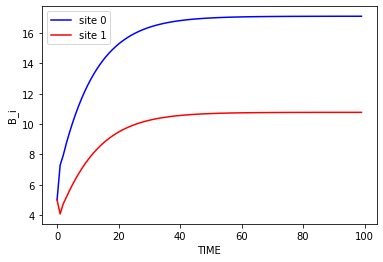

In [6]:
# start with two neighborhoods
p = np.array([2, 3])
b = np.array([5, 5])
s = np.array([1, 1])
hood0 = Hood1D(z=2, n=100, p=p, b=b, s=s, beta=.023, theta=0.05)
hood0.loop()
hood0.graph()
plt.savefig('bvp_fig0.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


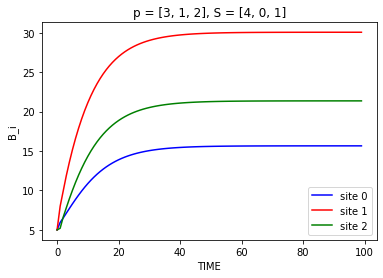

In [19]:
# START HERE
p = np.array([3, 1, 2])
b = np.array([5, 5, 5])
s = np.array([4, 0, 1])
hood5 = Hood1D(z=3, n=100, p=p, b=b, s=s, beta=.025, theta=0.05)
hood5.loop()
hood5.graph()
plt.title("p = [3, 1, 2], S = [4, 0, 1]")
plt.savefig('dm_0.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


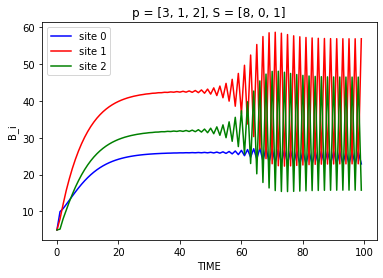

In [20]:
# NOW DOUBLE THE CRIME RATE IN ONE AREA
p = np.array([3, 1, 2])
b = np.array([5, 5, 5])
s = np.array([8, 0, 1])
hood5 = Hood1D(z=3, n=100, p=p, b=b, s=s, beta=.025, theta=0.05)
hood5.loop()
hood5.graph()
plt.title("p = [3, 1, 2], S = [8, 0, 1]")
plt.savefig('dm_1.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


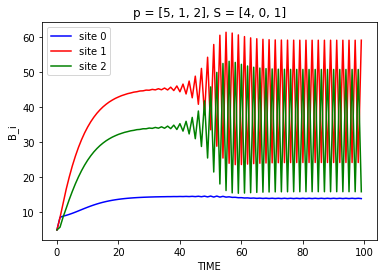

In [21]:
# Increase the police presence in in low crime areas, and 
# oscillation disappears
p = np.array([5, 1, 2])
b = np.array([5, 5, 5])
s = np.array([8, 0, 1])
hood5 = Hood1D(z=3, n=100, p=p, b=b, s=s, beta=.025, theta=0.05)
hood5.loop()
hood5.graph()
plt.title("p = [5, 1, 2], S = [4, 0, 1]")
plt.savefig('dm_2.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


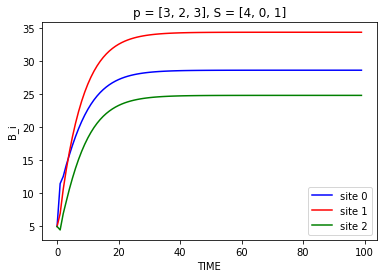

In [22]:
# Increase the police presence in in low crime areas, and 
# oscillation disappears
p = np.array([3, 2, 3])
b = np.array([5, 5, 5])
s = np.array([8, 0, 1])
hood5 = Hood1D(z=3, n=100, p=p, b=b, s=s, beta=.025, theta=0.05)
hood5.loop()
hood5.graph()
plt.title("p = [3, 2, 3], S = [4, 0, 1]")
plt.savefig('dm_3.eps', format='eps')